## 1. Packaging

In [1]:
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
# Sklearn processing
from sklearn import preprocessing # to normalize data
from sklearn.model_selection import train_test_split
import sklearn.decomposition as sk # to compute PCA

# sklearn for ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [3]:
# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

2025-10-09 15:31:35.368941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Custom analysis modules
from analysis_modules import *

np.random.seed(0)
tf.random.set_seed(0) 

## 2. Read file and load data

### 2.1 Read file

In [5]:
def leeDatos():

    # Load data
    data_file = "covid.csv"
    dataSet = pd.read_csv(data_file, header=0, index_col=0)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

In [6]:
# get data
datos = leeDatos()

In [7]:
# View data information
describeData(datos)

            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   

            CHIAPAS  CHIHUAHUA  DISTRITO FEDERAL  COAHUILA  COLIMA  DURANGO  \
date                                                                          
2020-02-26        0          0                 0         0       0        0   
2020-02-27        0          0                 2         0       0        0   
2020-02-28        0          0                 0         1       0        0   
2020-02-29        1          0                 0         0

### 2.2 Preprocessing

In [8]:
def graficaDatos(dataSet=0):

    plt.figure()
    for i in range(len(dataSet.columns)):
        plt.plot(dataSet.iloc[:,i],label=dataSet.columns[i],marker=i+2,markevery=150)
    plt.grid(color='b',linestyle='dashed')
    plt.gcf().autofmt_xdate()
    plt.title('COVID-19', fontweight='bold')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend(loc='upper left')
    plt.show()

def procesarDatos(dataSet=0):
    """
    Normalize and smooth data
    """
    dataSet = dataSet.fillna(method='ffill')

    # fit the scaler
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(dataSet)

    # Transform the data using the fitted scaler
    np_dataSet = scaler.transform(dataSet)

    # Convert the numpy array back to a DataFrame
    dataSet = pd.DataFrame(np_dataSet, columns=dataSet.columns, index=dataSet.index)

    # computing range of data for a simple regression
    #size = len(dataSet)
    #x = range(size)
    #numFeatures = len(dataSet.columns)

    #for i in range(numFeatures):
    #    polyCoef = np.polyfit(x, dataSet.iloc[:,i], 3)   # coefficients 10
    #    regModel = np.poly1d(polyCoef)              # equation
    #    regSpace = np.linspace(1, size, size)          # generate n numbers between a range
    #    dataSet.iloc[:,i] = regModel(regSpace)

    return dataSet

In [9]:
# select states
estados = ['Nacional', 'MEXICO', 'DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'MORELOS','PUEBLA','QUERETARO']

# get selected data
misDatos = datos[estados]
print(misDatos)

            Nacional  MEXICO  DISTRITO FEDERAL  GUANAJUATO  JALISCO  MORELOS  \
date                                                                           
2020-02-26         0       0                 0           0        0        0   
2020-02-27         4       1                 2           0        0        0   
2020-02-28         2       1                 0           0        0        0   
2020-02-29         2       1                 0           0        0        0   
2020-03-01         2       0                 0           1        0        0   
...              ...     ...               ...         ...      ...      ...   
2023-06-20       444      30                74          17        8        1   
2023-06-21       405      28                77          13       10        2   
2023-06-22       388      39                79          10        6        2   
2023-06-23       213      15                37           5        7        0   
2023-06-24        15       1            

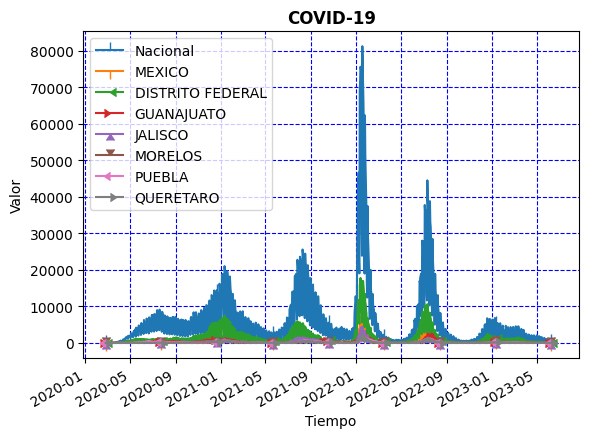

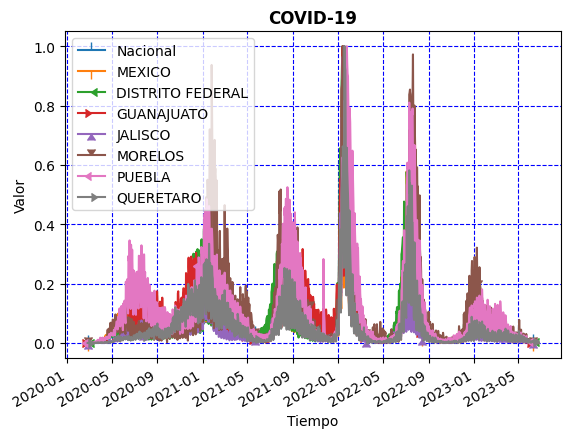

In [10]:
graficaDatos(misDatos)

datosProcesados = procesarDatos(misDatos)

graficaDatos(datosProcesados)

### 2.3 Correlation analysis

In [11]:
def computeCorr(dataSet=0):
    """
    Compute CORRELATION
    """

    # correlation analysis
    correlation=dataSet.corr(method = 'pearson')
    print("==========================================================")
    print("                 CORRELATION ANALYSIS")
    print("----------------------------------------------------------")
    print(correlation)
    print("\n")

    plt.figure()
    sns.heatmap(correlation, annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()

                 CORRELATION ANALYSIS
----------------------------------------------------------
                  Nacional    MEXICO  DISTRITO FEDERAL  GUANAJUATO   JALISCO  \
Nacional          1.000000  0.981782          0.967602    0.921567  0.951693   
MEXICO            0.981782  1.000000          0.965431    0.892375  0.930876   
DISTRITO FEDERAL  0.967602  0.965431          1.000000    0.874854  0.895145   
GUANAJUATO        0.921567  0.892375          0.874854    1.000000  0.836382   
JALISCO           0.951693  0.930876          0.895145    0.836382  1.000000   
MORELOS           0.833116  0.829820          0.822637    0.846371  0.762118   
PUEBLA            0.855105  0.849786          0.804302    0.888353  0.783835   
QUERETARO         0.948653  0.936622          0.931995    0.921206  0.884305   

                   MORELOS    PUEBLA  QUERETARO  
Nacional          0.833116  0.855105   0.948653  
MEXICO            0.829820  0.849786   0.936622  
DISTRITO FEDERAL  0.822637  0.80

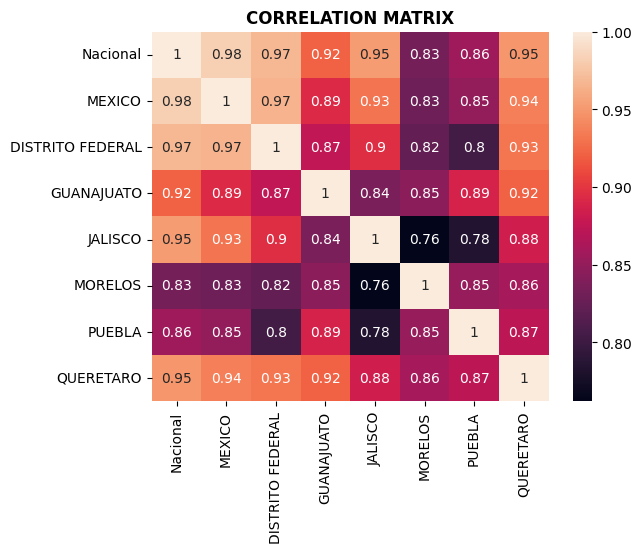

In [12]:
# compute correlation
computeCorr(datosProcesados)

### 2.4 PCA

In [13]:
# compute PCA
def computePCA(dataSet, num_comp=3):
    """
    Compute PCA
    """
    features = dataSet
    features = features.drop([dataSet.columns[0]], axis=1)

    pca = sk.PCA(n_components=num_comp)
    principalComponents = pca.fit_transform(features)
    comp_names = ['P. Comp. {}'.format(i+1) for i in range(num_comp)]
    principalComp = pd.DataFrame(data = principalComponents.tolist(),
                                 columns = comp_names)
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp[dataSet.columns[0]] = dataSet[dataSet.columns[0]]
    cols = [dataSet.columns[0]] + sorted(comp_names)
    principalComp = principalComp[cols]
    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    # explained variance ratio
    varRatio = (pca.explained_variance_ratio_)*100
    dic = {'P. Comp. {}'.format(i+1): varRatio[i] for i in range(num_comp)}
    expVar = pd.DataFrame(dic, index=['Exp Var Ratio %'])

    # Principal axes in feature space, representing the directions of maximum variance
    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(num_comp)]
    # get the names
    initial_feature_names = features.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(num_comp)]
    # complete the dataframe
    # LIST COMPREHENSION HERE AGAIN
    dic = {'P. Comp. {}'.format(i+1): most_important_names[i] for i in range(num_comp)}
    #df = pd.DataFrame(dic.items()).T
    expVar = pd.concat([expVar, pd.DataFrame(dic, index =['Most Imp. F.'])])
    print(expVar)
    print("\n")

    return principalComp

                 PCA ANALYSIS
----------------------------------------------------------
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26  0.000000   -0.237889   -0.012999   -0.013661
2020-02-27  0.000049   -0.237805   -0.013092   -0.013694
2020-02-28  0.000025   -0.237847   -0.013042   -0.013668
2020-02-29  0.000025   -0.237847   -0.013042   -0.013668
2020-03-01  0.000025   -0.237764   -0.013008   -0.013568
...              ...         ...         ...         ...
2023-06-20  0.005461   -0.228689   -0.016179   -0.012406
2023-06-21  0.004981   -0.225812   -0.014089   -0.010547
2023-06-22  0.004772   -0.227021   -0.014472   -0.011778
2023-06-23  0.002620   -0.233595   -0.015345   -0.012969
2023-06-24  0.000184   -0.236997   -0.012798   -0.012844

[1215 rows x 4 columns]


                P. Comp. 1 P. Comp. 2 P. Comp. 3
Exp Var Ratio %  88.163132   4.955556   3.312283
Most Imp. F.       MORELOS    MORELOS     PUE

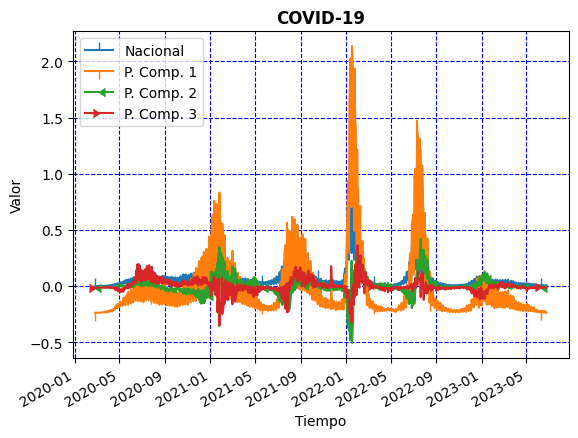

In [14]:
num_comp = 3
pcaData = computePCA(datosProcesados, num_comp=num_comp)

graficaDatos(pcaData)
print("\n")

### 2.5 Split Data

In [15]:
# --------------------
# split data
def splitDataSet(dataSet=0, test_size=.2, randSplit=True):
    """
    Split data in train and test sets
    """

    train, test = train_test_split(dataSet, test_size=test_size, shuffle=randSplit, random_state=0)

    return [train, test]

Train set
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26  0.000000   -0.237889   -0.012999   -0.013661
2020-02-27  0.000049   -0.237805   -0.013092   -0.013694
2020-02-28  0.000025   -0.237847   -0.013042   -0.013668
2020-02-29  0.000025   -0.237847   -0.013042   -0.013668
2020-03-01  0.000025   -0.237764   -0.013008   -0.013568

trainSet shape:  (911, 4)



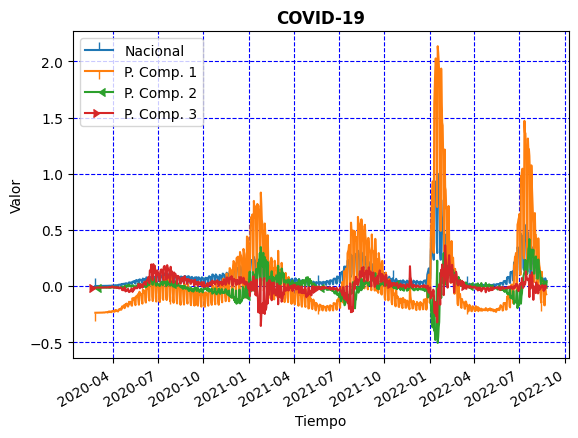

Test set
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2022-08-25  0.040356   -0.107938    0.016264   -0.021029
2022-08-26  0.036235   -0.123463    0.012457   -0.006748
2022-08-27  0.014022   -0.192249   -0.001694   -0.012638
2022-08-28  0.013628   -0.194807   -0.001365   -0.011415
2022-08-29  0.047108   -0.110507   -0.002827   -0.014569

testSet shape:  (304, 4)



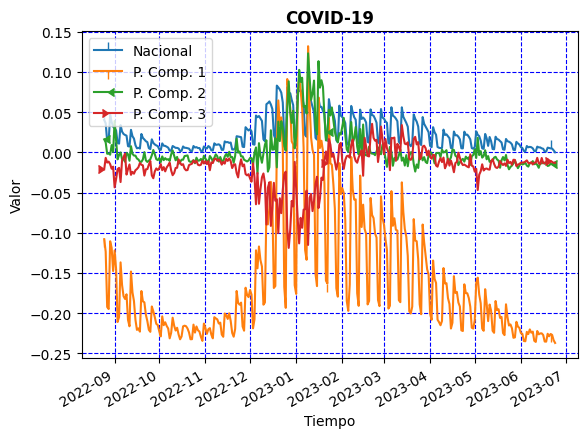

In [16]:
# Split data into training and test sets
ts_size = .25
[trainSet, testSet] = splitDataSet(pcaData, test_size=ts_size, randSplit=False)
print("Train set")
print(trainSet.head())
print()
print('trainSet shape: ', trainSet.shape)
print()
graficaDatos(trainSet)

print("Test set")
print(testSet.head())
print()
print('testSet shape: ', testSet.shape)
print()
graficaDatos(testSet)

## 3. ML methods

In [37]:
def metodosML(dataSet=0, dataSet2=0):

    methodsUsed=['DT', 'RF', 'SVM', 'NN MLP']
    performanceHeaders=['RSS','SSR','TSS','R-Square','Adj. R-Square']
    comperrHeaders=['MSE','RMSE', 'MAPE']
    errorHeaders=['Mean','Median', 'SD','25%','50%','75%','Min','Max','Range']
    modPerformance = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
    modPerformance.index.name = "Model Performance"
    comperr = pd.DataFrame(index=methodsUsed, columns=comperrHeaders)
    comperr.index.name = "Error Metrics"
    regError = pd.DataFrame(index=methodsUsed, columns=errorHeaders)
    regError.index.name = "Relative Error"
    modPerformance3 = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
    modPerformance3.index.name = "Model Performance"
    comperr3 = pd.DataFrame(index=methodsUsed, columns=comperrHeaders)
    comperr3.index.name = "Error Metrics"
    regError3 = pd.DataFrame(index=methodsUsed, columns=errorHeaders)
    regError3.index.name = "Relative Error"

    trainModel = pd.DataFrame()
    testModel = pd.DataFrame()
    yModel = pd.DataFrame()
    yModel3 = pd.DataFrame()
    trainModel['Raw Data'] = dataSet.iloc[:,0]
    testModel['Raw Data'] = dataSet2.iloc[:,0]
    sizeData=len(dataSet.columns)-1

    # Decision Tree regression ********
    print("Decision Tree Regression")
    regr = DecisionTreeRegressor(max_depth=4)
    regr.fit(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1))
    print("Estimated Parameters:")
    print(f"Max depth of trees (max_depth): {regr.max_depth}")
    print("\n")

    # train data
    trainModel['Fitted DT'] = regr.predict(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData))
    yModel['Fitted DT'] = trainModel['Fitted DT']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'DT', dataSet, 0, regError, comperr, modPerformance, 0)
    
    # test data
    testModel['Fitted DT'] = regr.predict(dataSet2.iloc[:,1:].to_numpy().reshape(len(dataSet2),sizeData))
    yModel3['Fitted DT'] = testModel['Fitted DT']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'DT', dataSet2, 0, regError3, comperr3, modPerformance3, 0)


    # Random Forest regression ********
    print("Random Forest Regression")
    regr = RandomForestRegressor(n_estimators=4)
    regr.fit(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1))
    print("Estimated Parameters:")
    print(f"Number of trees (n_estimators): {regr.n_estimators}")
    print(f"Max depth of trees (max_depth): {regr.max_depth}")
    print("\n")
    
    # train data
    trainModel['Fitted RT'] = regr.predict(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData))
    yModel['Fitted RT'] = trainModel['Fitted RT']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'RT', dataSet, 0, regError, comperr, modPerformance, 1)
   
    # test data
    testModel['Fitted RT'] = regr.predict(dataSet2.iloc[:,1:].to_numpy().reshape(len(dataSet2),sizeData))
    yModel3['Fitted RT'] = testModel['Fitted RT']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'RT', dataSet2, 0, regError3, comperr3, modPerformance3, 1)


    # SVM regression ********
    regr = svm.SVR(kernel="poly", degree=4, coef0=1)
    regr.fit(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1))
    print("Estimated Parameters:")
    print(f"Kernel: {regr.kernel}")
    print(f"Degree (degree): {regr.degree}")
    print(f"Coefficient (coef0): {regr.coef0}")
    print("\n")

    # train data
    trainModel['Fitted SVM'] = regr.predict(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData))
    yModel['Fitted SVM'] = trainModel['Fitted SVM']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'SVM', dataSet, 0, regError, comperr, modPerformance, 2)
    
    # test data
    testModel['Fitted SVM'] = regr.predict(dataSet2.iloc[:,1:].to_numpy().reshape(len(dataSet2),sizeData))
    yModel3['Fitted SVM'] = testModel['Fitted SVM']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'SVM', dataSet2, 0, regError3, comperr3, modPerformance3, 2)


    # NN MLP regression
    # Neural Networks TF
    print("Neural Networks MLP Regression")
    input_shape=dataSet.iloc[:,1].to_numpy().reshape(len(dataSet),1)[0].shape
    dropout_rate = 0.20
    model = Sequential([
                        Flatten(input_shape=(input_shape)),
                        Dense(16, activation='relu'),
                        Dropout(dropout_rate),
                        #Dense(8, activation='relu'),
                        #Dropout(dropout_rate),
                        Dense(1)
                        ])

    opt = tf.keras.optimizers.SGD()
    loss_fun = 'mean_squared_error'
    acc = tf.keras.metrics.MeanAbsoluteError()

    model.compile(
        optimizer=opt,
        loss=loss_fun,
        metrics=[acc]
        )

    print(model.summary())
    print("\n")

    epochs = 60
    history = model.fit(dataSet.iloc[:,1].to_numpy().reshape(len(dataSet),1),
                        dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1),
                        validation_split=0.20, epochs=epochs)

    fig = plt.figure()
    fig.add_subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Loss vs Epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')

    fig.add_subplot(122)
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title("Mean Absolute Error vs Epochs")
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

    print(model.evaluate(dataSet.iloc[:,1].to_numpy().reshape(len(dataSet),1), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1), verbose=2))
    print("\n")

    #### predict train data ######
    trainModel['Fitted NN'] = model.predict(dataSet.iloc[:,1].to_numpy().reshape(len(dataSet),1))
    yModel['Fitted NN'] = trainModel['Fitted NN']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'NN', dataSet, 0, regError, comperr, modPerformance, 3)

    # test data
    testModel['Fitted NN'] = model.predict(dataSet2.iloc[:,1].to_numpy().reshape(len(dataSet2),1))
    yModel3['Fitted NN'] = testModel['Fitted NN']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'NN', dataSet2, 0, regError3, comperr3, modPerformance3, 3)

    #  print results
    print("\n")
    print("=======================================================================")
    print("                      MODEL PERFORMANCE COMPARISON")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(modPerformance.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print("-----------------------------------------------------------------------")
    print(modPerformance3.T)
    print("=======================================================================")
    print("                      ERROR METRICS")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(comperr.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print(comperr3.T)
    print("=======================================================================")
    print("                      MAPE (RELATIVE ERROR) COMPARISON")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(regError.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print("-----------------------------------------------------------------------")
    print(regError3.T)
    print("\n")
    
    # plot residuals and relative error for DT
    plt.figure()
    plt.plot(yModel3['Fitted DT'], yModel3['Residuals DT'],'o', color='g',label='Residuals')
    plt.grid(color='b',linestyle='dashed')
    plt.axhline(y=0, color='red')
    plt.title("DT Model Residuals", fontweight='bold')
    plt.xlabel('Predictor')
    plt.ylabel('Residuals')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure()
    plt.plot(yModel3['Rel Error_DT'], color='orange',label='Relative Error', linestyle='--')
    plt.grid(color='b',linestyle='dashed')
    plt.gcf().autofmt_xdate()
    plt.title('MAPE DT', fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Date (t)')
    plt.legend(loc='upper right')
    plt.show()


    return [trainModel, testModel]

# --------------------
# create performance tables
def compareMethod(yModel, method, dataSet, y, regError, comperr, modPerformance, i):
    name_fit = 'Fitted ' + method
    name_res = 'Residuals ' + method
    name_err = 'Rel Error_' + method

    size = len(yModel)

    # compute residuals and relative error
    yModel[name_res] = dataSet.iloc[:,y] - yModel[name_fit]
    yModel[name_err] = (1-(yModel[name_fit]/dataSet.iloc[:,y])).abs()
    regError.iloc[i,0] = yModel[name_err].mean(axis=0)
    regError.iloc[i,1] = yModel[name_err].median(axis=0)
    regError.iloc[i,2] = yModel[name_err].std(axis=0)
    regError.iloc[i,3] = yModel[name_err].quantile(q=.25)
    regError.iloc[i,4] = yModel[name_err].quantile(q=.5)
    regError.iloc[i,5] = yModel[name_err].quantile(q=.75)
    regError.iloc[i,6] = yModel[name_err].min()
    regError.iloc[i,7] = yModel[name_err].max()
    regError.iloc[i,8] = regError.iloc[i,7] - regError.iloc[i,6]

    # Models Performance
    modPerformance.iloc[i,0] = (yModel[name_res]**2).sum()
    modPerformance.iloc[i,1] = ((yModel[name_fit]-dataSet.iloc[:,y].mean(axis=0))**2).sum()
    modPerformance.iloc[i,2] = modPerformance.iloc[i,0]+modPerformance.iloc[i,1]
    modPerformance.iloc[i,3] = 1-modPerformance.iloc[i,0]/modPerformance.iloc[i,2]
    modPerformance.iloc[i,4] = 1-(1-modPerformance.iloc[i,3])*((size-1)/(size-4-1))

    # error metrics
    comperr.iloc[i,0] = modPerformance.iloc[i,0]/size
    comperr.iloc[i,1] = comperr.iloc[i,0]**(1/2)
    comperr.iloc[i,2] = regError.iloc[i,0]

    return (yModel, regError, comperr, modPerformance)

Decision Tree Regression
Estimated Parameters:
Max depth of trees (max_depth): 4


Random Forest Regression
Estimated Parameters:
Number of trees (n_estimators): 4
Max depth of trees (max_depth): None


Estimated Parameters:
Kernel: poly
Degree (degree): 4
Coefficient (coef0): 1


Neural Networks MLP Regression
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
 dense_23 (Dense)            (None, 16)                32        
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total

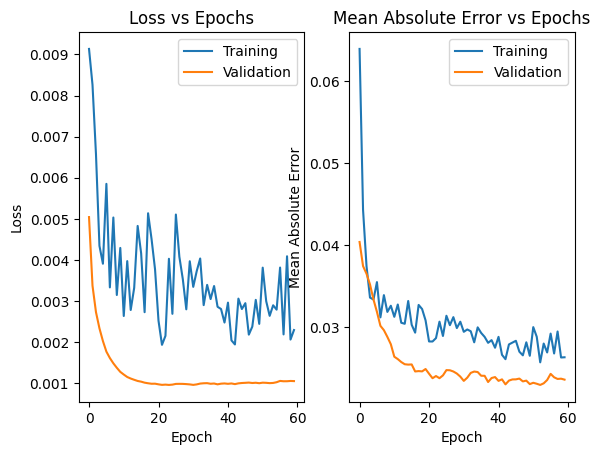

29/29 - 0s - loss: 0.0012 - mean_absolute_error: 0.0207 - 50ms/epoch - 2ms/step
[0.0011760821798816323, 0.02070010080933571]


10/10 [==============================] - 0s 1ms/step


                      MODEL PERFORMANCE COMPARISON
-----------------------------------------------------------------------
                      Training
-----------------------------------------------------------------------
Model Performance         DT         RF        SVM     NN MLP
RSS                 0.430593    0.07657   3.548124   1.071411
SSR                14.435578  14.523521  12.210782  12.177728
TSS                14.866171  14.600091  15.758905  13.249139
R-Square            0.971035   0.994756    0.77485   0.919134
Adj. R-Square       0.970907   0.994732   0.773856   0.918777
-----------------------------------------------------------------------
                      Testing
-----------------------------------------------------------------------
Model Performance        DT        RF       SV

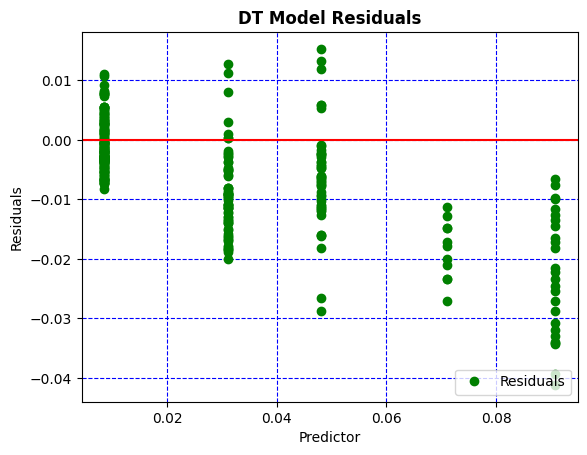

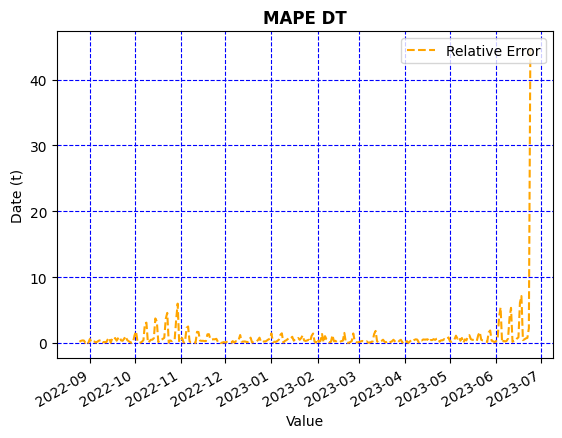



Train predictions vs Raw Data


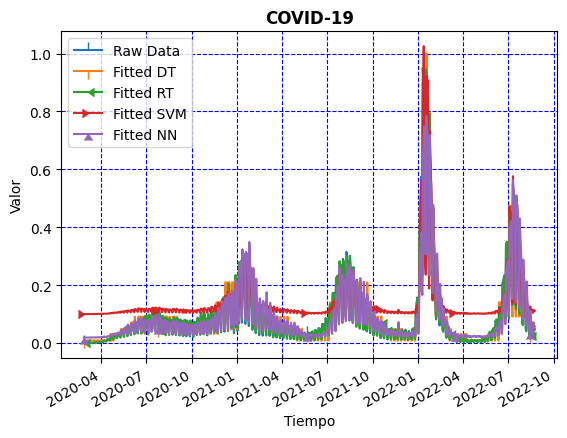



Test predictions vs Raw Data


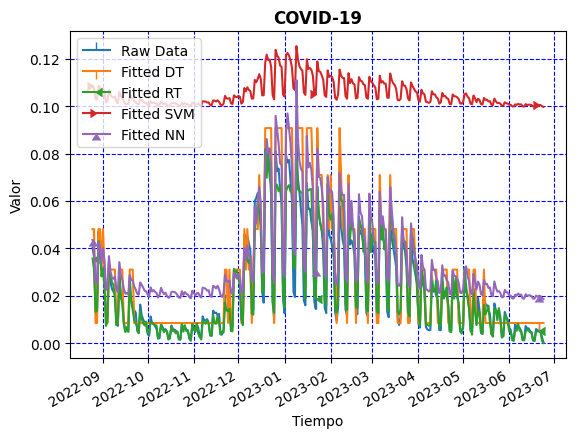

In [39]:
[trainModel, testModel] = metodosML(trainSet, testSet)

# plot results
print("\n")
print("Train predictions vs Raw Data")
graficaDatos(trainModel)
print("\n")
print("Test predictions vs Raw Data")
graficaDatos(testModel)